# Tirgul 8: Dementia Prediction with Tree-based Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

# Read Data

In [52]:
data = pd.read_csv('oasis_cross-sectional.csv')

data.tail()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0
435,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0


# Feature selection
- Filter data
- Determine prediction label
- Label categorization
- Train/Test split

In [53]:
features = ['M','F','R','Age','Educ','SES','MMSE','eTIV','nWBV','ASF']
pred_label = ['CDR']

fm_df = pd.get_dummies(data['M/F'])
hands_df = pd.get_dummies(data['Hand'])

data = pd.concat([data,fm_df],axis=1)
data = pd.concat([data,hands_df],axis=1)

data = data[features + pred_label+['M/F','Hand']].dropna()

# Turning values into categories

data['CDR'] = data['CDR'].astype('category').cat.codes

X = data[features]
y = data[pred_label]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

X.head()

,M,F,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0,1,1,74,2.0,3.0,29.0,1344,0.743,1.306
1,0,1,1,55,4.0,1.0,29.0,1147,0.810,1.531
2,0,1,1,73,4.0,3.0,27.0,1454,0.708,1.207
8,1,0,1,74,5.0,2.0,30.0,1636,0.689,1.073
9,0,1,1,52,3.0,2.0,30.0,1321,0.827,1.329


# Evaluation function

In [120]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values.reshape((-1,1))
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   
    print("Classified {:.3f}% as sick, where the in the true data {:} where sick.".format(100*(pred>0).sum()/len(pred),(y.values>0).sum()))
    


# Tree plotting funtion

In [55]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show()


# Training

## Vanil tree

In [121]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 11
Acc: 0.523
MSE: 0.905
Classified 47.727% as sick, where the in the true data 0 where sick.


## Max-depth = 4

Acc: 0.614
MSE: 0.892
Classified 38.636% as sick, where the in the true data 0 where sick.


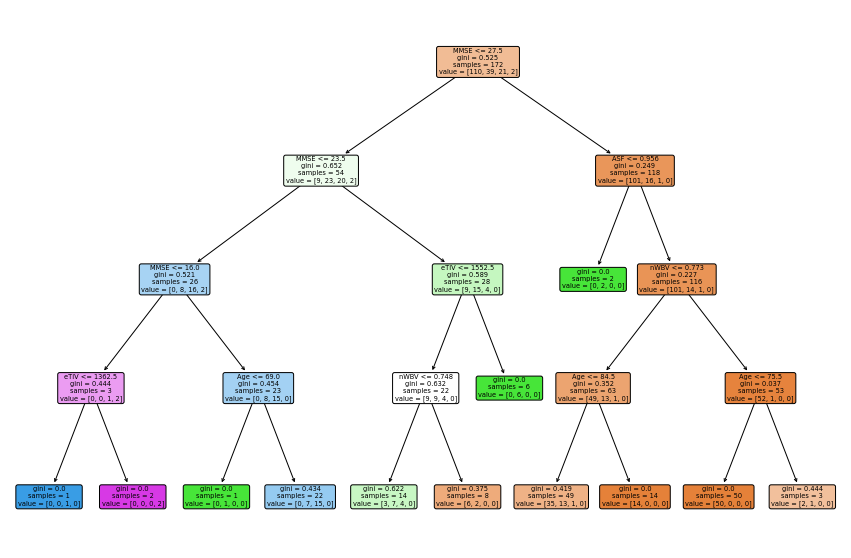

In [122]:
model = DecisionTreeClassifier(max_depth=4,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

## Max-depth = 1

Acc: 0.568
MSE: 0.657
Classified 43.182% as sick, where the in the true data 0 where sick.


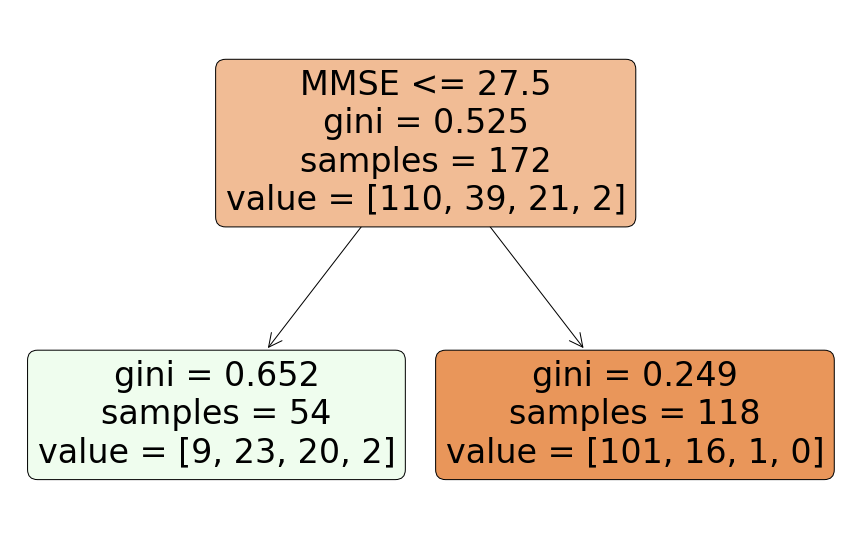

In [123]:
model = DecisionTreeClassifier(max_depth=1,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

The results seems to be better according to the evaluation function, but if we look at the leaves, we see that most of the subjects are not sick so 'Not Sick' is the safest geuss.

![smbc.png](smbc.png)

## Min samples leaf = 5

Acc: 0.614
MSE: 0.929
Classified 38.636% as sick, where the in the true data 0 where sick.


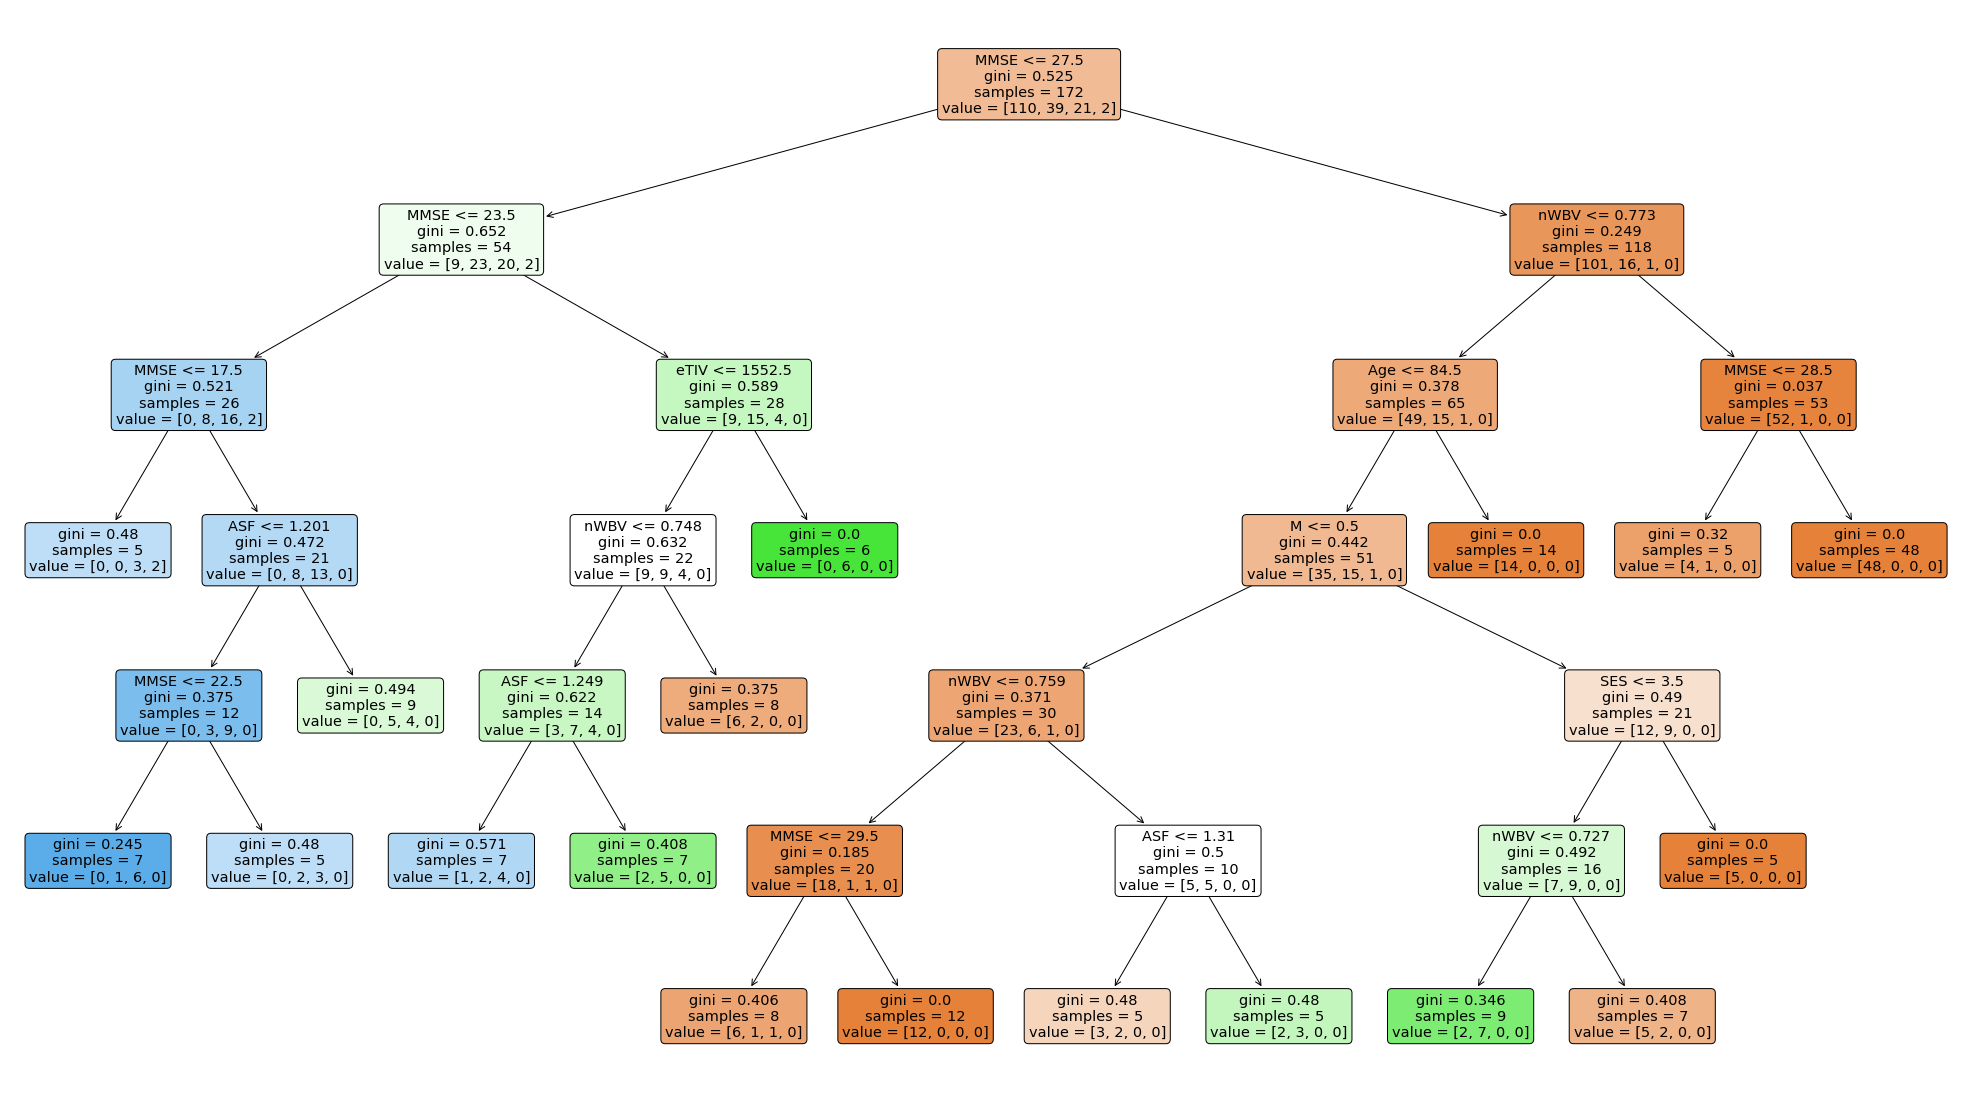

In [124]:
model = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))

## Min samples split = 5

Acc: 0.591
MSE: 0.905
Classified 40.909% as sick, where the in the true data 0 where sick.


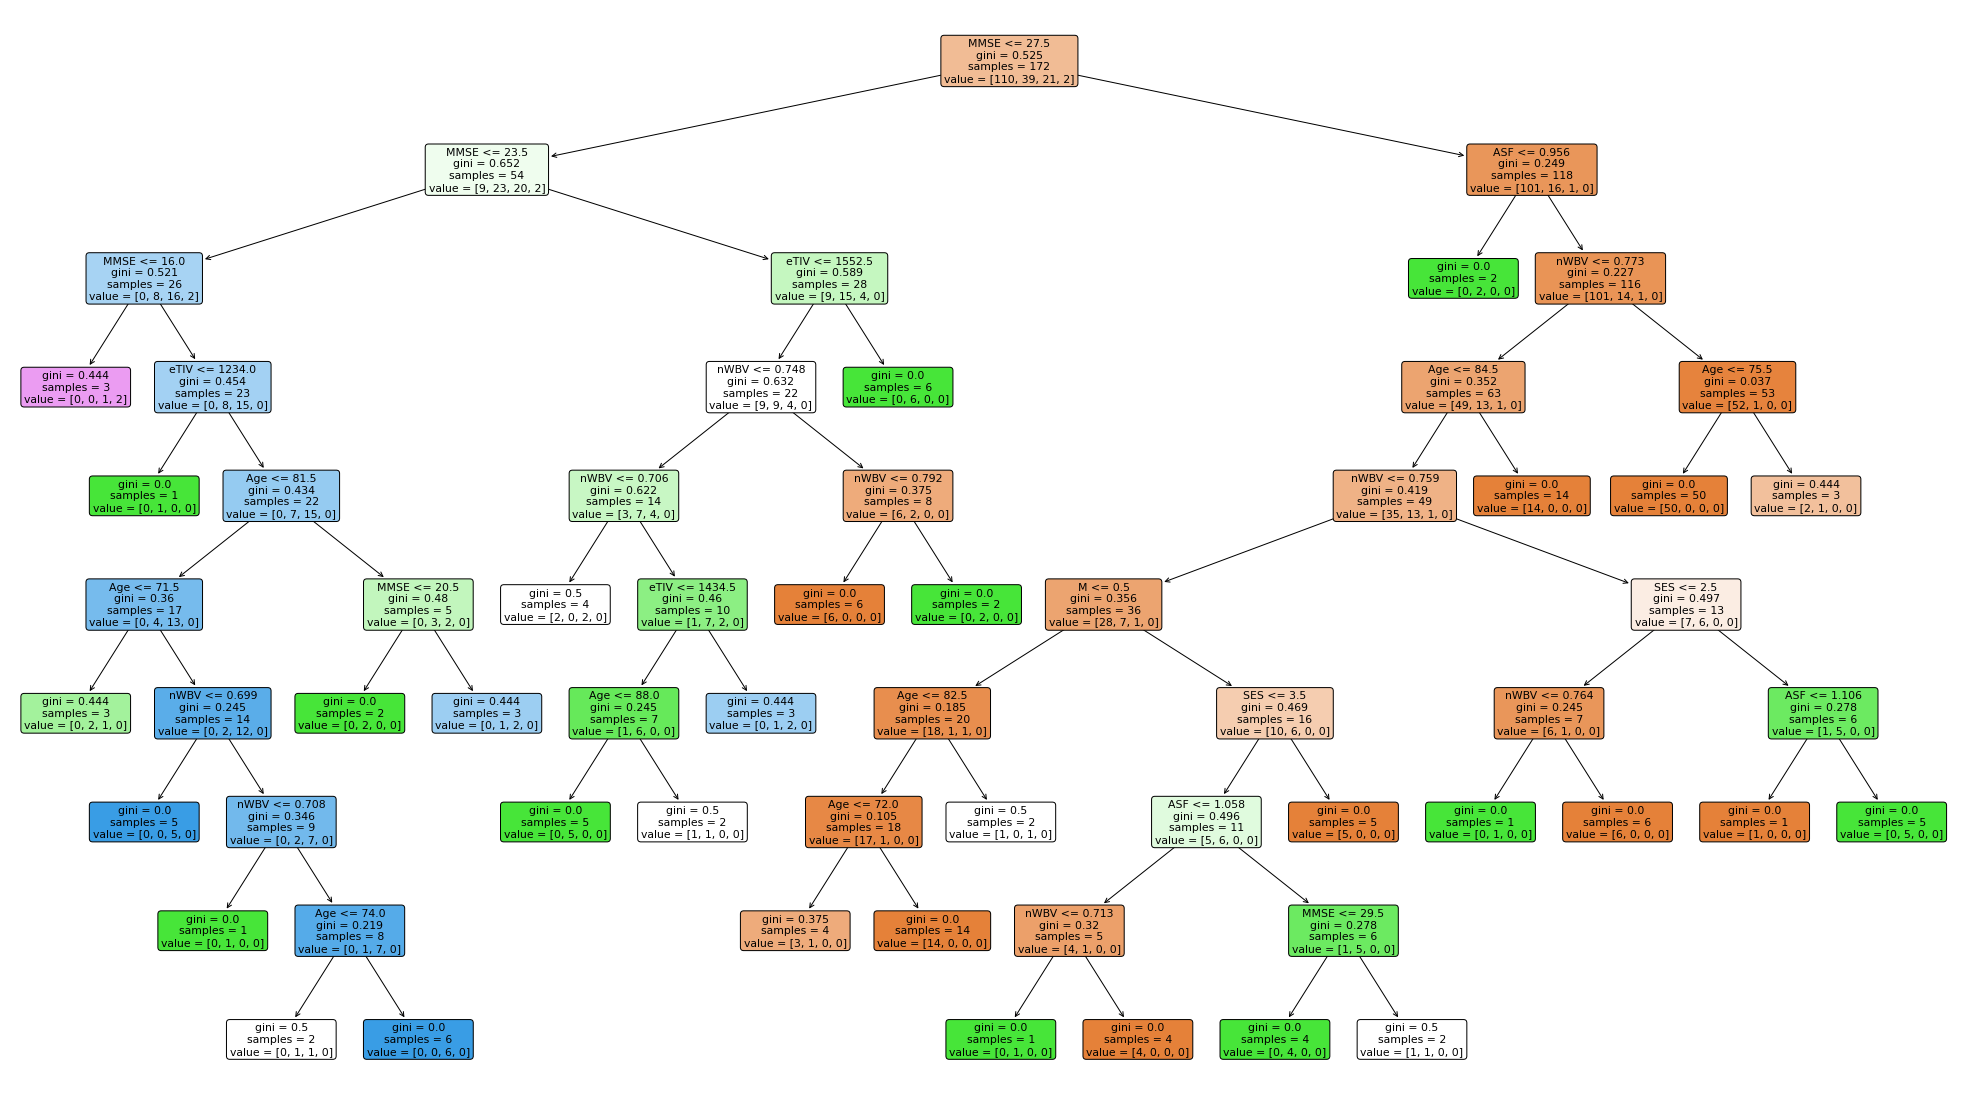

In [125]:
model = DecisionTreeClassifier(min_samples_split=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))